In [32]:
from openparse import DocumentParser, Pdf
from pprint import pprint
import re
import os

ELEMENT_DELIMETER = "<br><br>"
NEWLINE = "  \n"
DOUBLE_NEWLINE = "\n\n"

pdf_path = "../docs/abc.pdf"


parser = DocumentParser(
    table_args={
        "parsing_algorithm": "pymupdf",
        "table_output_format": "markdown",
    },
)

parsed_pdf = parser.parse(pdf_path)
pprint(parsed_pdf)

ParsedDocument(id_='104d690f-38f9-4464-a27c-c8e420ff236e', nodes=[Node(id_='ae4d2df7-6f2b-4982-bc88-9d34b28a8504', elements=(TextElement(text='独创性声明\n本人声明所呈交的学位论文是我个人在导师的指导下进行的研究', lines=(LineElement(bbox=(250.44, 721.69, 360.47, 743.64), spans=(TextSpan(text='独创性声明', is_bold=False, is_italic=False, size=21.95),), style=None, text='独创性声明'), LineElement(bbox=(113.04, 699.79, 505.08, 713.84), spans=(TextSpan(text='本人声明所呈交的学位论文是我个人在导师的指导下进行的研究', is_bold=False, is_italic=False, size=14.05),), style=None, text='本人声明所呈交的学位论文是我个人在导师的指导下进行的研究')), bbox=Bbox(page=2, page_height=841.9, page_width=595.3, x0=113.04, y0=699.79, x1=505.08, y1=743.64), variant=<NodeVariant.TEXT: 'text'>, embed_text='独创性声明\n本人声明所呈交的学位论文是我个人在导师的指导下进行的研究'), TextElement(text='工作及取得的研究成果。尽我所知，除文中已标明引用的内容外，本', lines=(LineElement(bbox=(85.08, 668.59, 505.2, 682.64), spans=(TextSpan(text='工作及取得的研究成果。尽我所知，除文中已标明引用的内容外，本', is_bold=False, is_italic=False, size=14.05),), style=None, text='工作及取得的研究成果。尽我所知，除文中已标明引用的内容外，本'),), bbox=

In [33]:
pdf_dict = parsed_pdf.model_dump()
pprint(pdf_dict)

{'coordinate_system': 'bottom-left',
 'creation_date': datetime.date(2024, 5, 22),
 'file_size': 2174743,
 'filename': 'abc.pdf',
 'last_accessed_date': datetime.date(2024, 5, 22),
 'last_modified_date': datetime.date(2024, 5, 22),
 'nodes': [{'bbox': [{'page': 2,
                      'page_height': 841.9,
                      'page_width': 595.3,
                      'x0': 85.08,
                      'x1': 505.2,
                      'y0': 574.99,
                      'y1': 743.64}],
            'embedding': None,
            'node_id': 'ae4d2df7-6f2b-4982-bc88-9d34b28a8504',
            'text': '独创性声明\n'
                    '本人声明所呈交的学位论文是我个人在导师的指导下进行的研究<br><br>工作及取得的研究成果。尽我所知，除文中已标明引用的内容外，本<br><br>论文不包含任何其他人或集体已经发表或撰写过的研究成果。对本文<br><br>的研究做出贡献的个人和集体，均已在文中以明确方式标明。本人完<br><br>全意识到本声明的法律结果由本人承担。',
            'tokens': 162,
            'variant': {'text'}},
           {'bbox': [{'page': 2,
                      'page_height': 841.9,
                      'page_width': 595.3,
       

In [34]:
def remove_spaces_and_newlines(text: str) -> str:
    # 使用正则表达式去掉汉字与汉字之间的空格和换行符
    text = re.sub(r"(?<=[\u4e00-\u9fff])\s+(?=[\u4e00-\u9fff])", "", text)
    # 使用正则表达式去掉英文与英文之间的空格和换行符
    text = re.sub(r"(?<=[a-zA-Z])\s+(?=[a-zA-Z])", "", text)
    # 使用正则表达式去掉汉字与英文之间的空格和换行符
    text = re.sub(r"(?<=[\u4e00-\u9fff])\s+(?=[a-zA-Z])", "", text)
    # 使用正则表达式去掉英文与汉字之间的空格和换行符
    text = re.sub(r"(?<=[a-zA-Z])\s+(?=[\u4e00-\u9fff])", "", text)
    return text

In [35]:
def extract_directory_lines(text):
    # 使用正则表达式匹配符合目录结构的文本行
    pattern = r"\d+\.\d+\.\d+.*-\d+"
    directory_lines = re.findall(pattern, text)
    return directory_lines

In [36]:
def write_text_to_markdown(data, output_file):
    formatted_text = ""
    for item in data:
        text = item["text"].replace("\n", NEWLINE).replace(ELEMENT_DELIMETER, NEWLINE)
        if "table" in item["variant"]:
            text = remove_spaces_and_newlines(text)

        if formatted_text == "":
            formatted_text = text
        else:
            formatted_text = formatted_text + DOUBLE_NEWLINE + text
    pprint(formatted_text)
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(formatted_text)


output_file = "output_markdown/document.md"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
write_text_to_markdown(pdf_dict["nodes"], output_file)

('独创性声明  \n'
 '本人声明所呈交的学位论文是我个人在导师的指导下进行的研究  \n'
 '工作及取得的研究成果。尽我所知，除文中已标明引用的内容外，本  \n'
 '论文不包含任何其他人或集体已经发表或撰写过的研究成果。对本文  \n'
 '的研究做出贡献的个人和集体，均已在文中以明确方式标明。本人完  \n'
 '全意识到本声明的法律结果由本人承担。\n'
 '\n'
 '学位论文版权使用授权书  \n'
 '本学位论文作者完全了解学校有关保留、使用学位论文的规定，  \n'
 '同意学校保留并向国家有关部门或机构送交论文的复印件和电子版，  \n'
 '允许论文被查阅和借阅。本人授权武汉东湖学院可以将本学位论文的  \n'
 '全部或部分内容编入有关数据库进行检索，可以采用影印、缩印或扫  \n'
 '描等复制手段保存和汇编本学位论文。  \n'
 '本论文属于保密口，在年解密后适用本授权书。  \n'
 '不保密\uf0fe  \n'
 '（请在以上方框内打“√”）  \n'
 '学位论文作者签名： 指导教师签名：  \n'
 '日期：年月日 日期：年月日\n'
 '\n'
 '随着人们对健康和健身的重视度不断提高，健身房行业也在迅速发展。然而，  \n'
 '传统的健身房预约系统存在着诸多问题，如效率低下、信息不透明、安全性差等。  \n'
 '本文提出了一种基于微信小程序与区块链技术的健身房预约系统的设计方案，旨  \n'
 '在解决上述问题。  \n'
 '基于微信小程序与区块链技术的健身房预约系统主要有两种用户管理员、学  \n'
 '生会员。管理员主要是处理学生会员的投诉以及在线处理学生会员的预约并可以  \n'
 '查看学生会员预订健身房的数据，并对这些数据件维护。并可以发布一些系统通  \n'
 '知，从而通知学生会员。并重点完成对基于微信小程序与区块链技术的健身房预\n'
 '\n'
 '约系统的健身器材管理，以及使用区块链进行对预约功能的设计。  \n'
 '基于微信小程序与区块链技术的健身房预约系统采用小程序技术开发，并采  \n'
 '用java作为后端代码开发，利用mysql进行对基于微信小程序与区块链技术的健  \n'
 '身房预约系统的数据存储。利用区块链技术对基于微信小程序与区块链技术的健  \n'
 '身房预约功能进

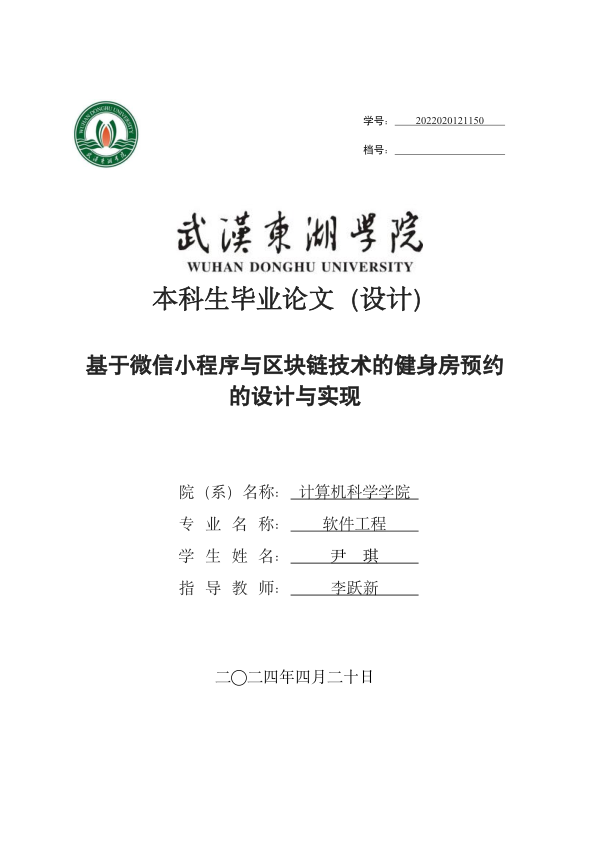

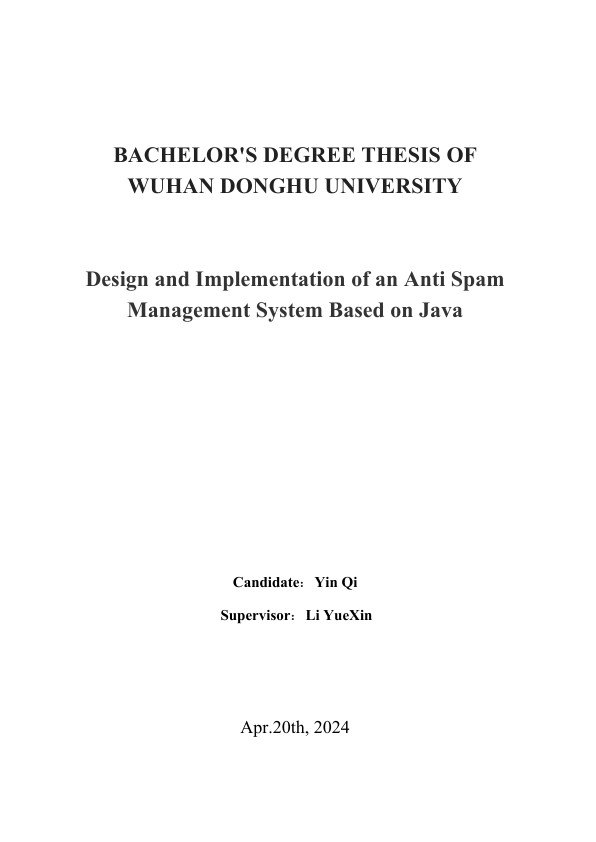

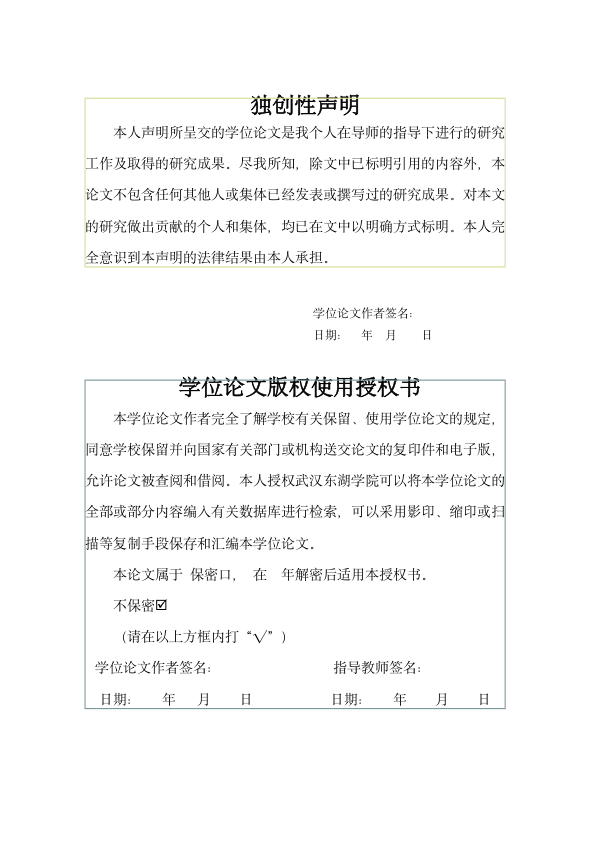

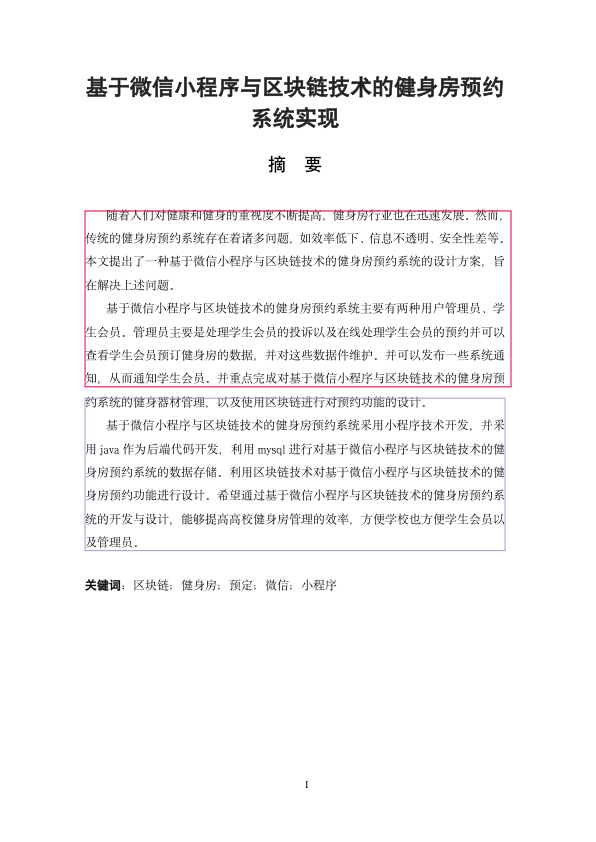

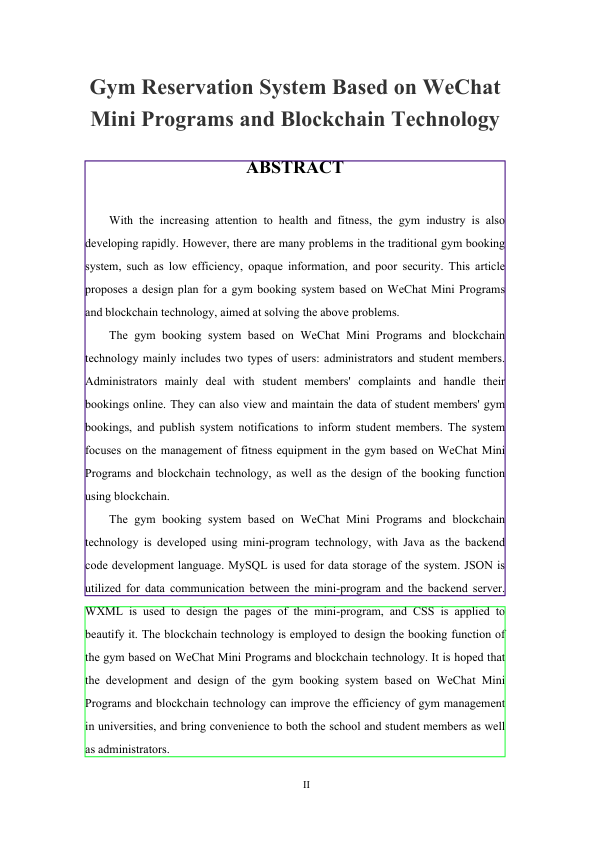

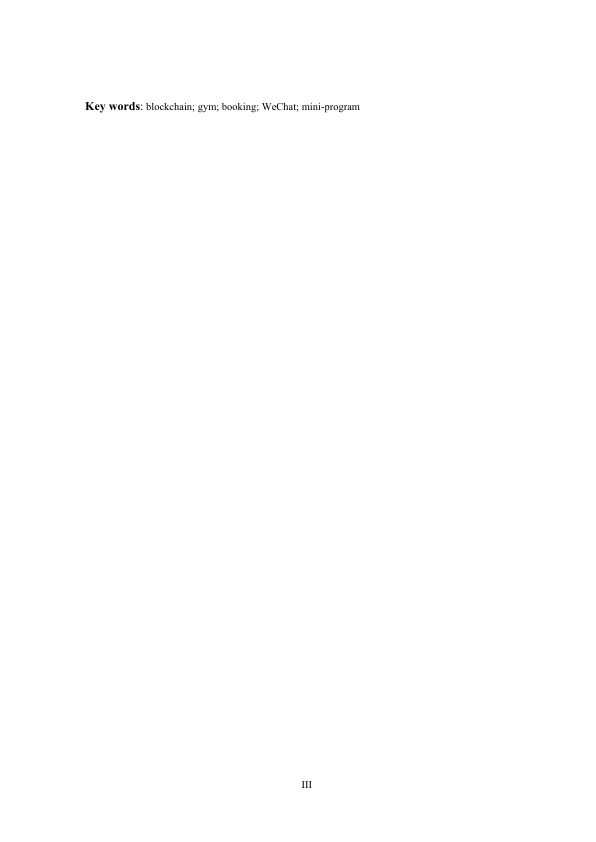

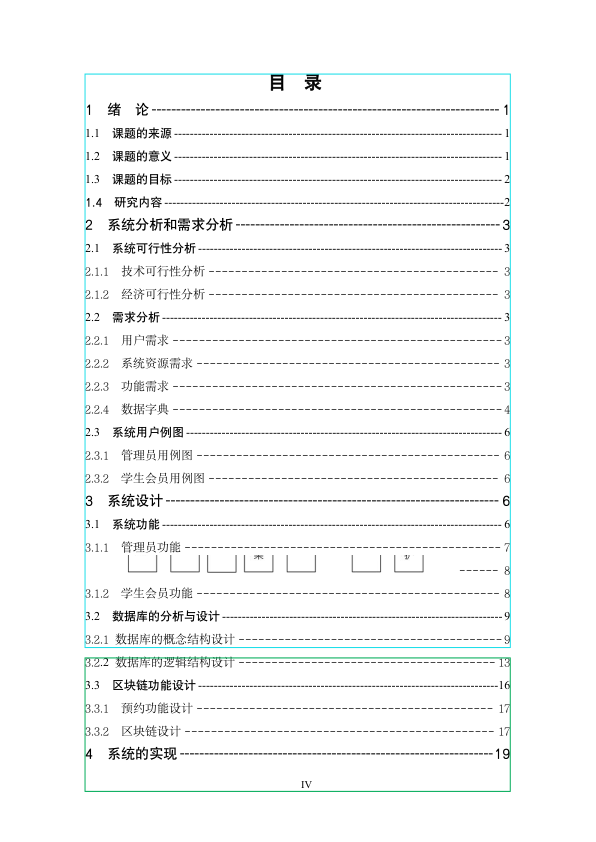

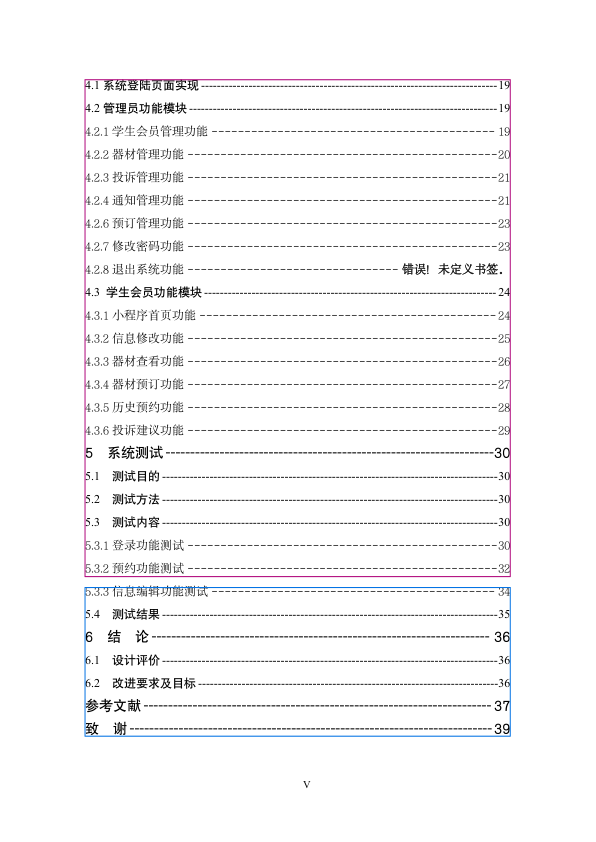

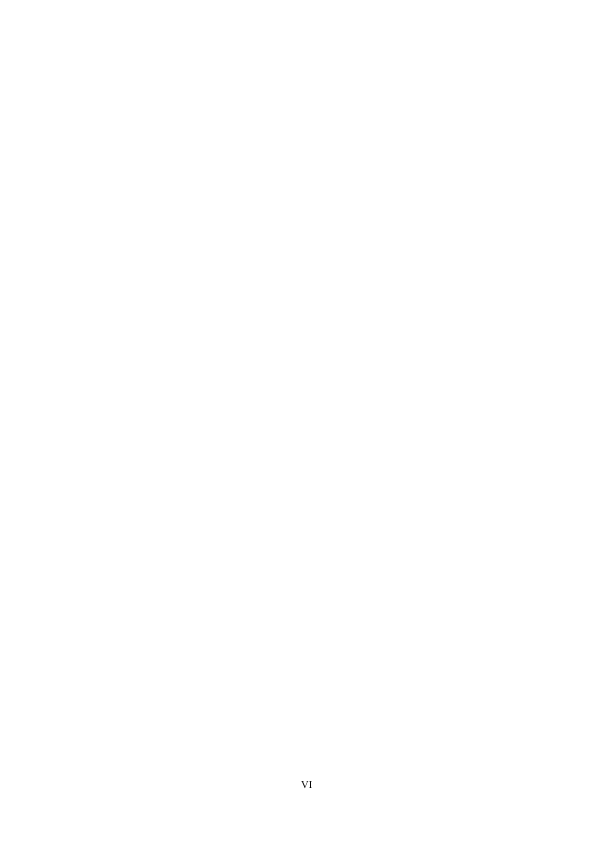

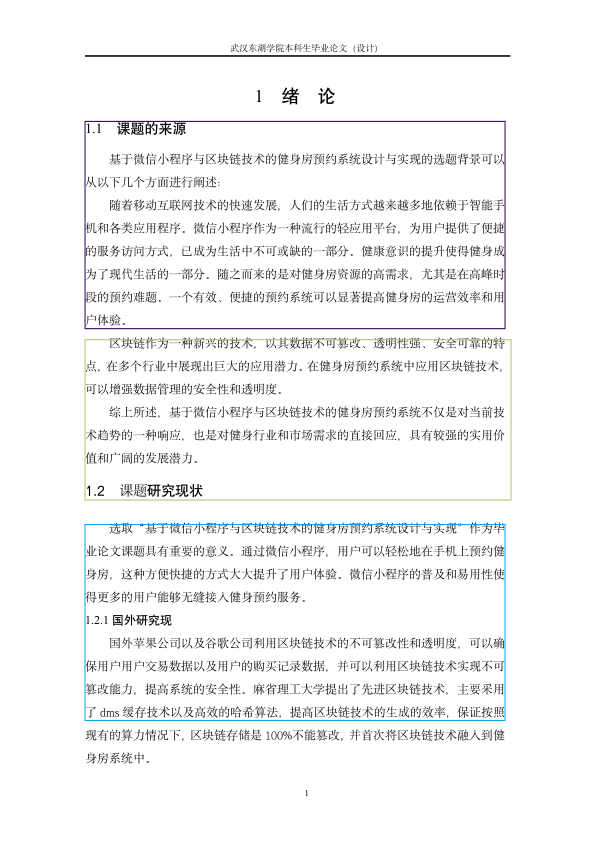

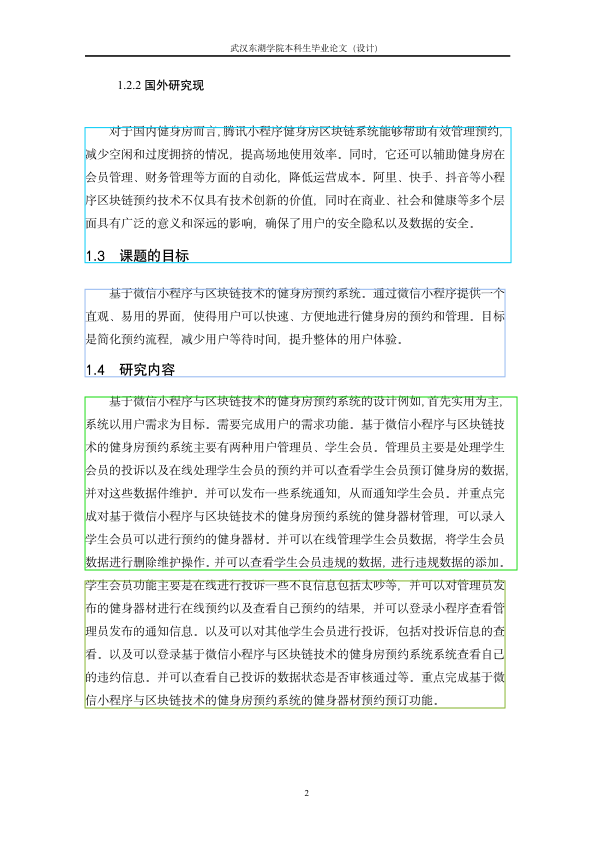

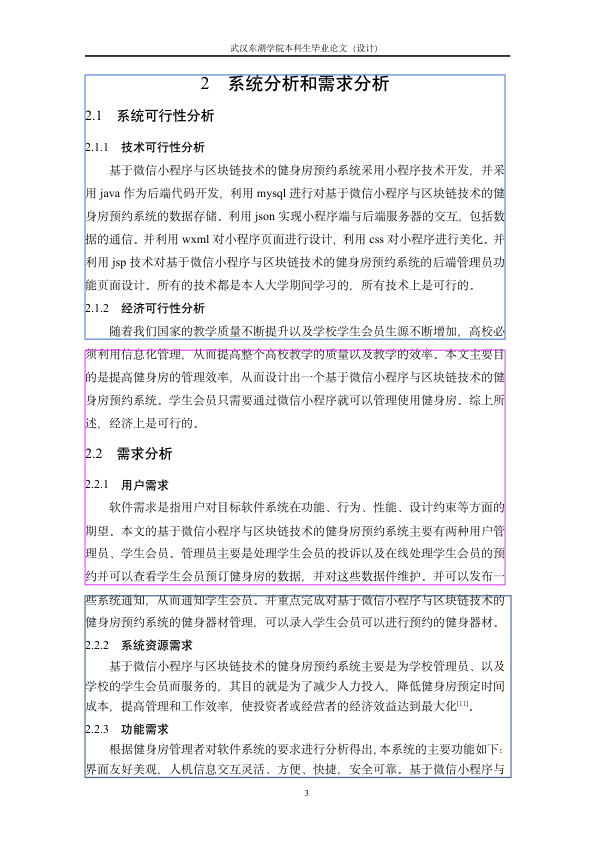

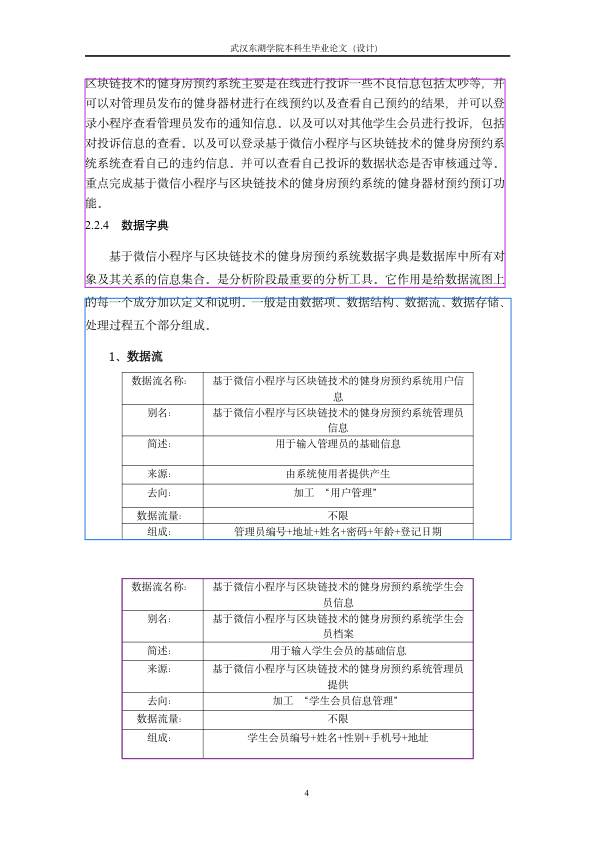

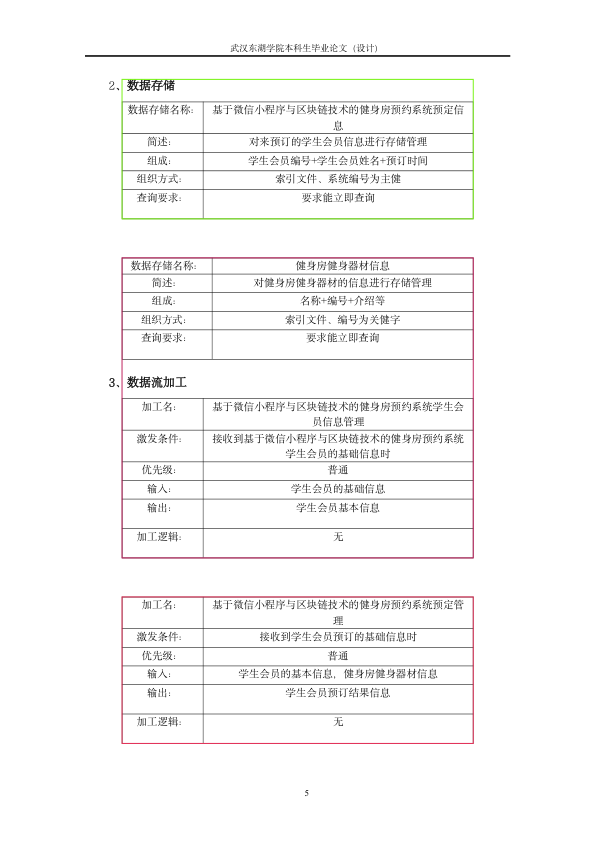

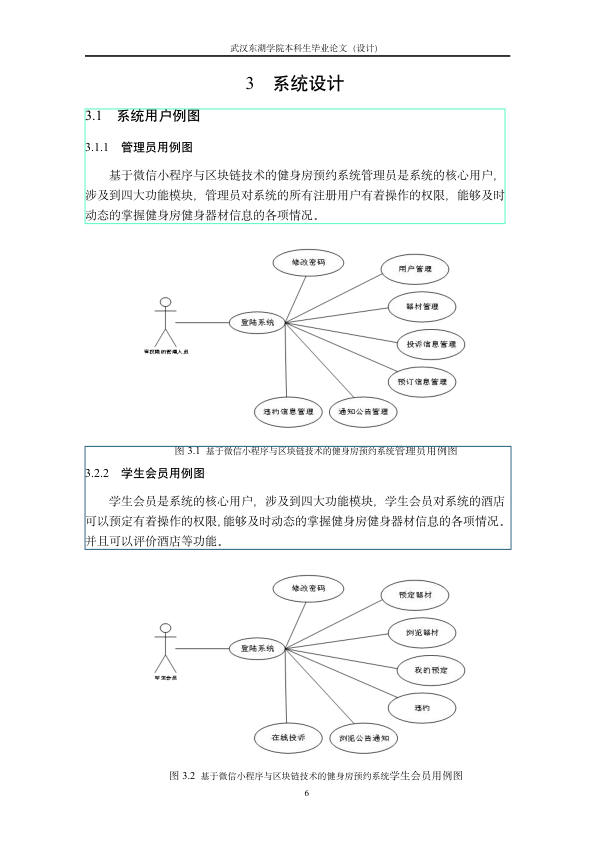

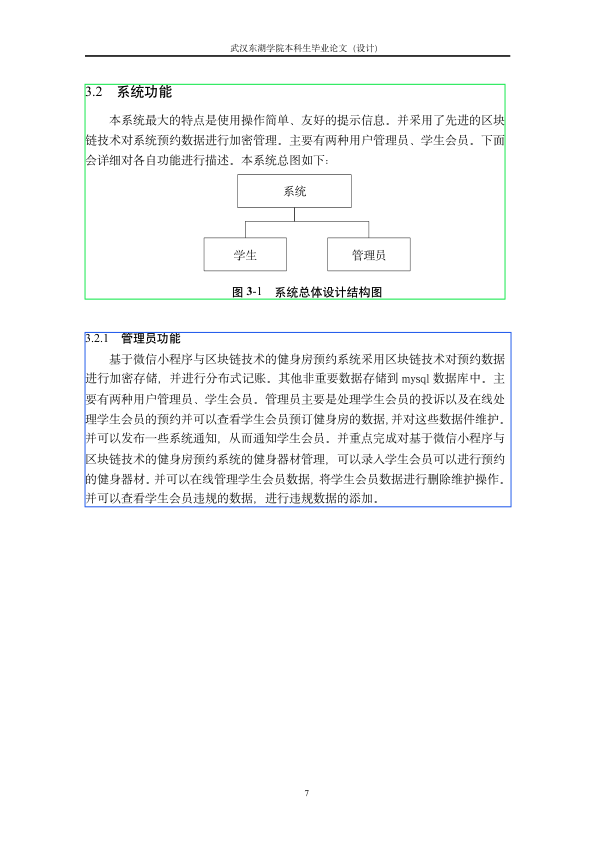

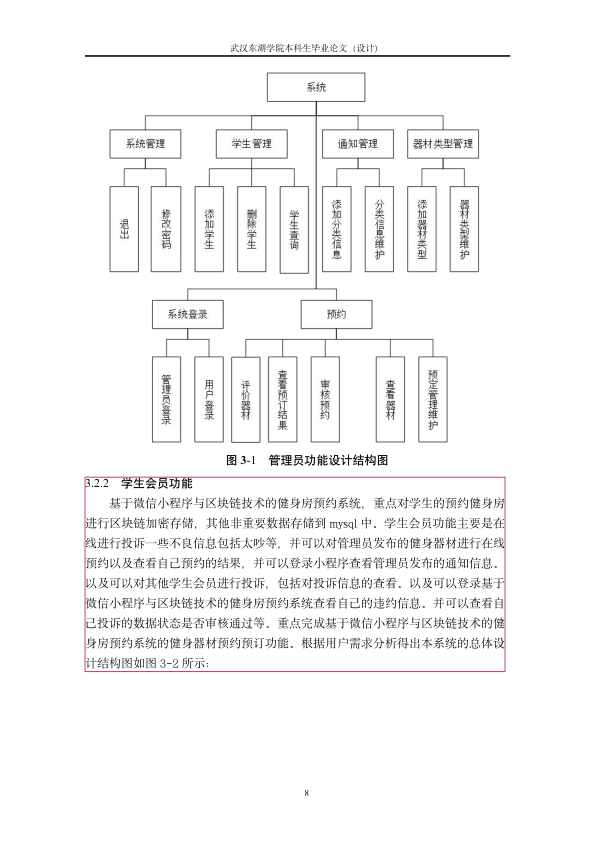

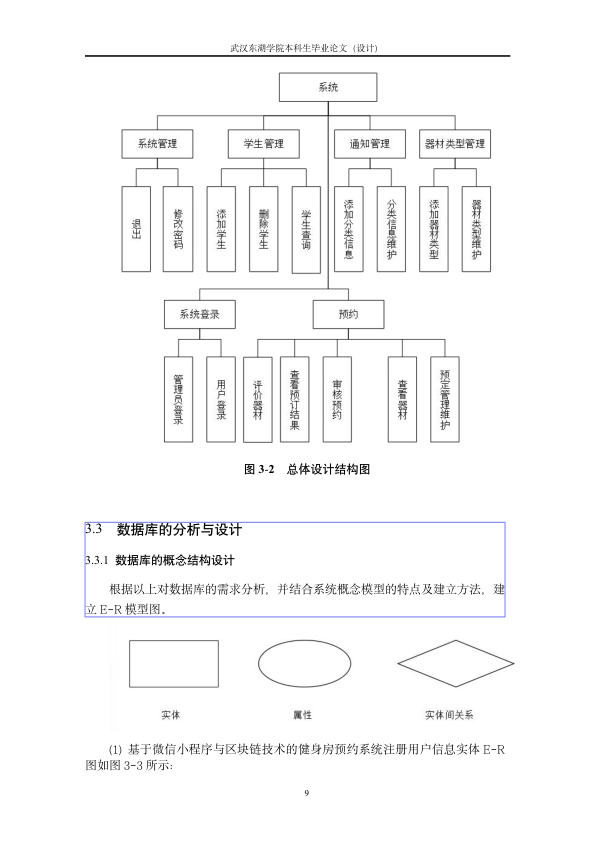

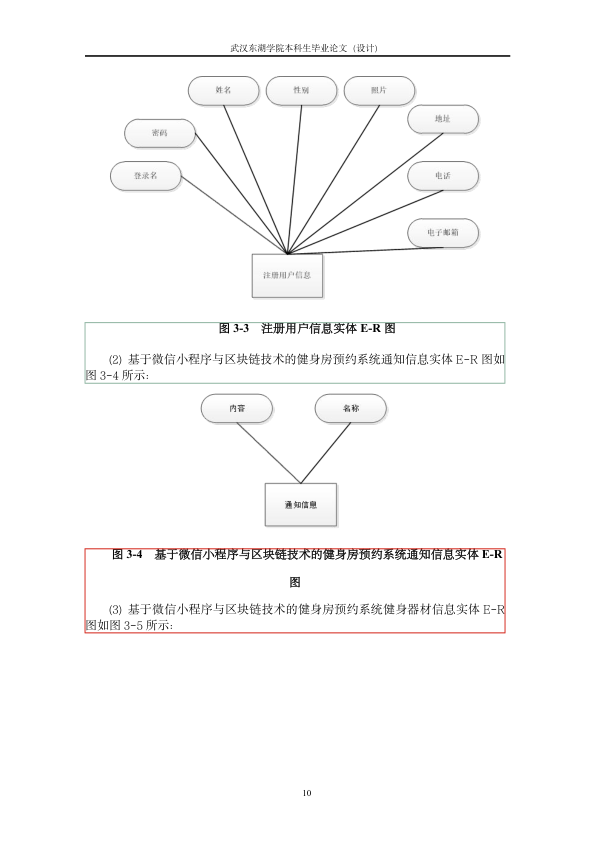

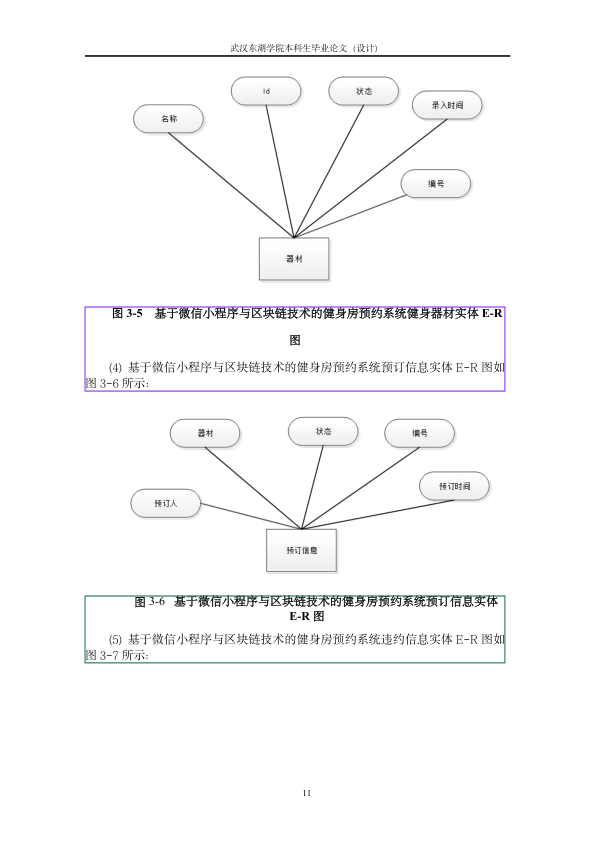

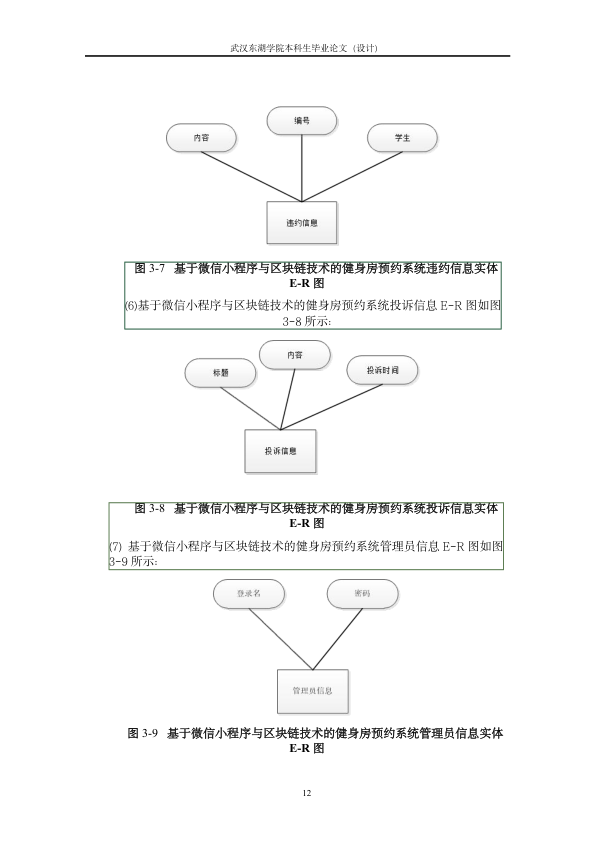

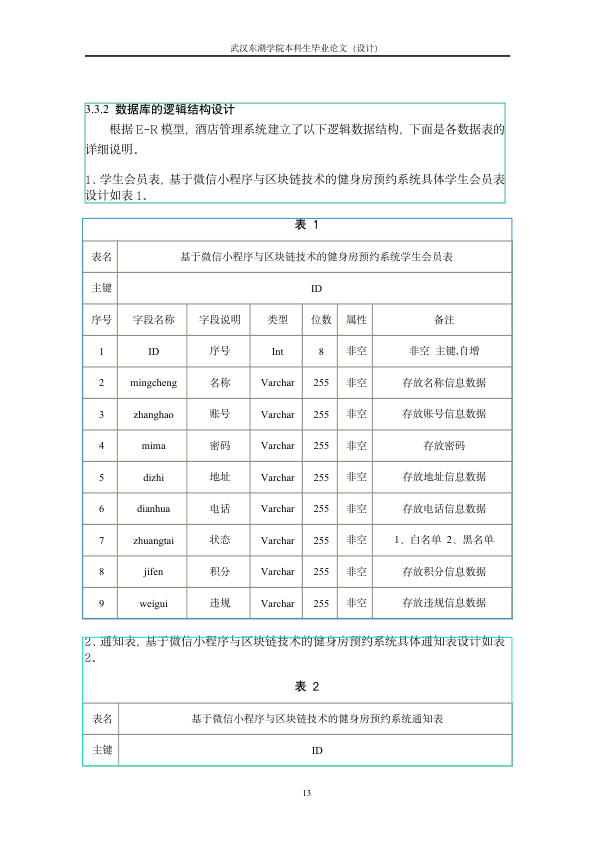

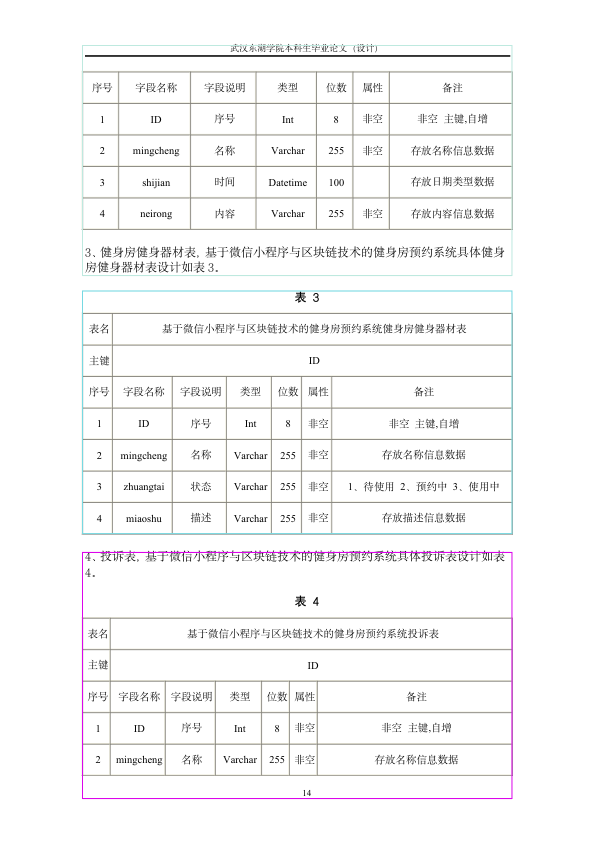

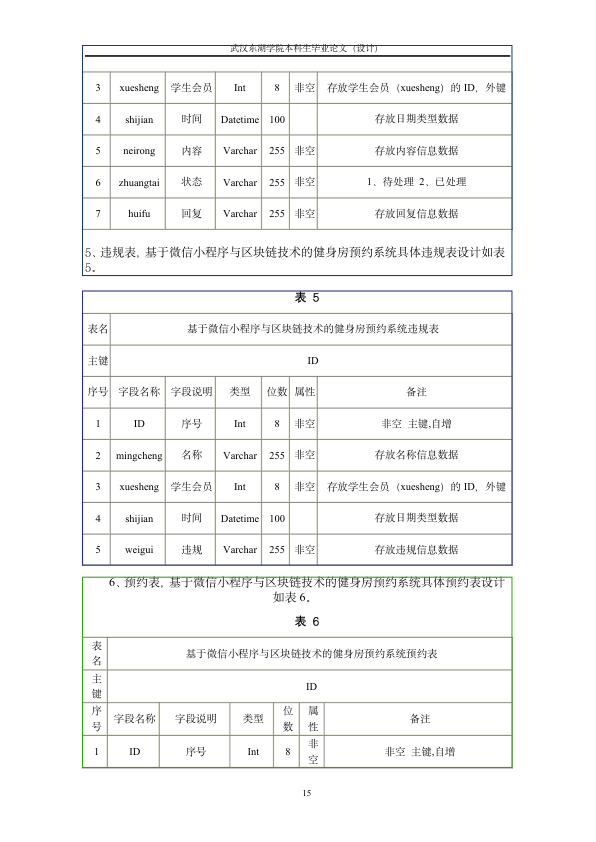

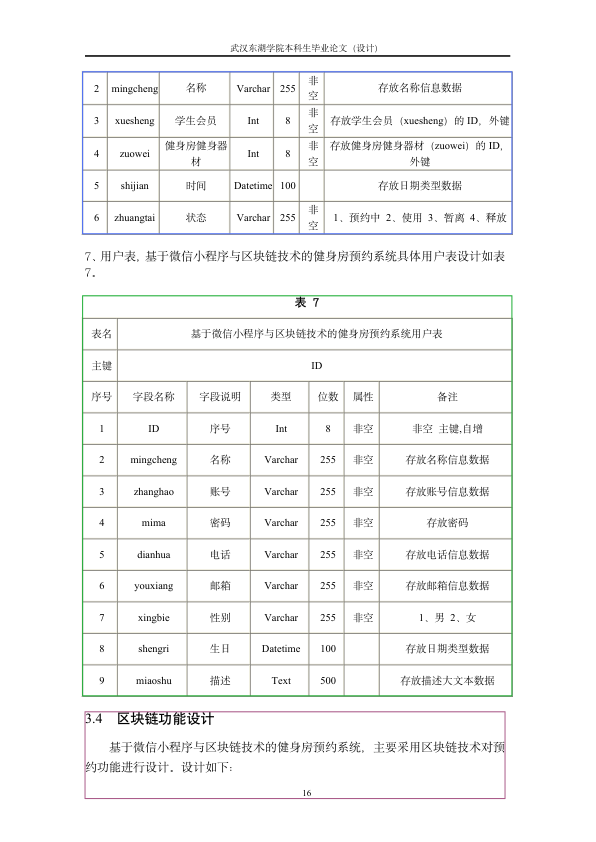

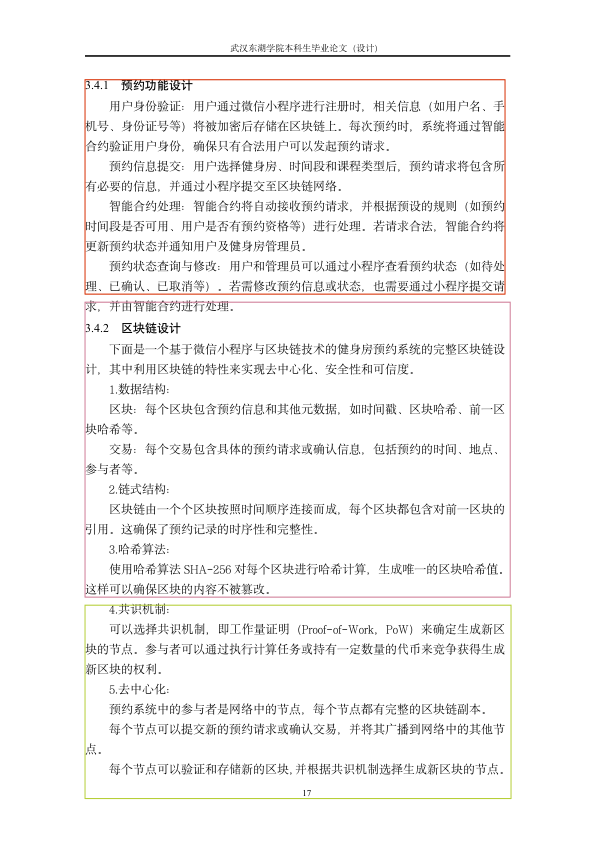

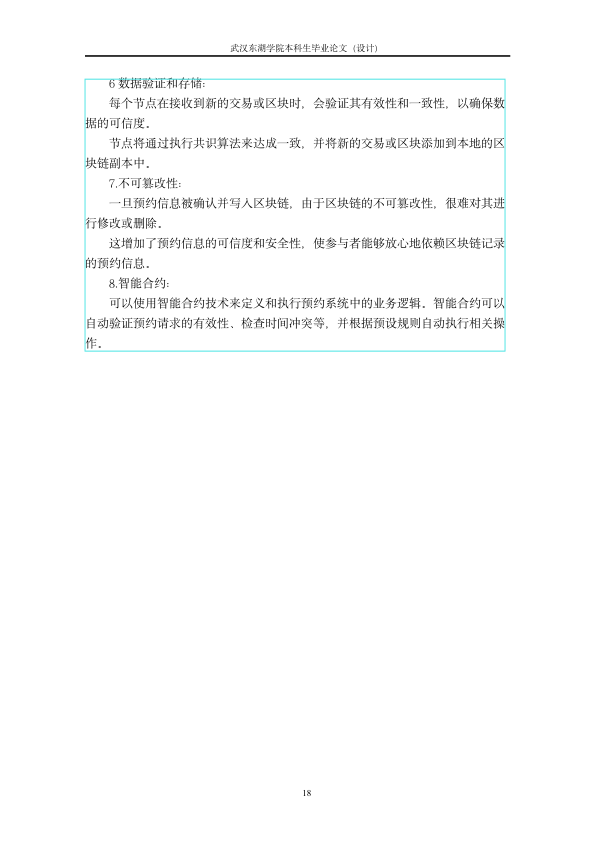

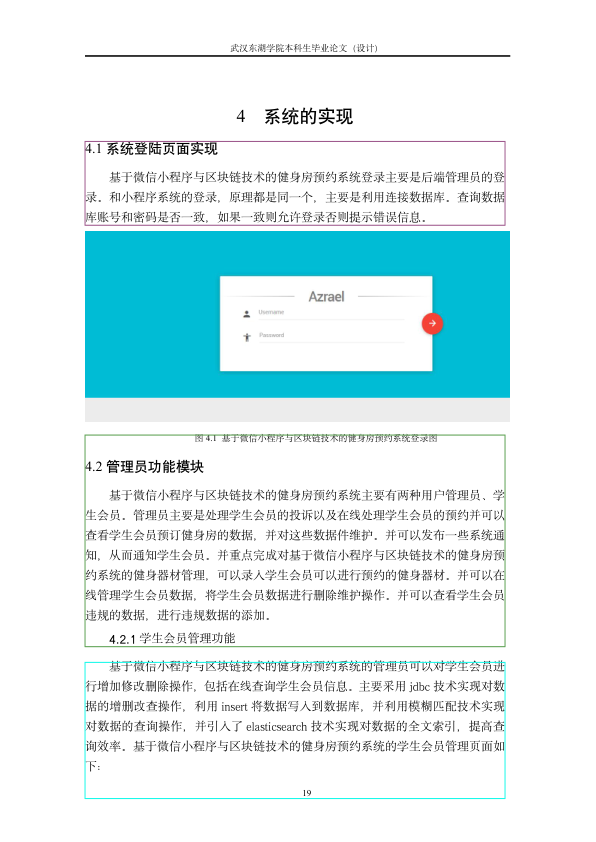

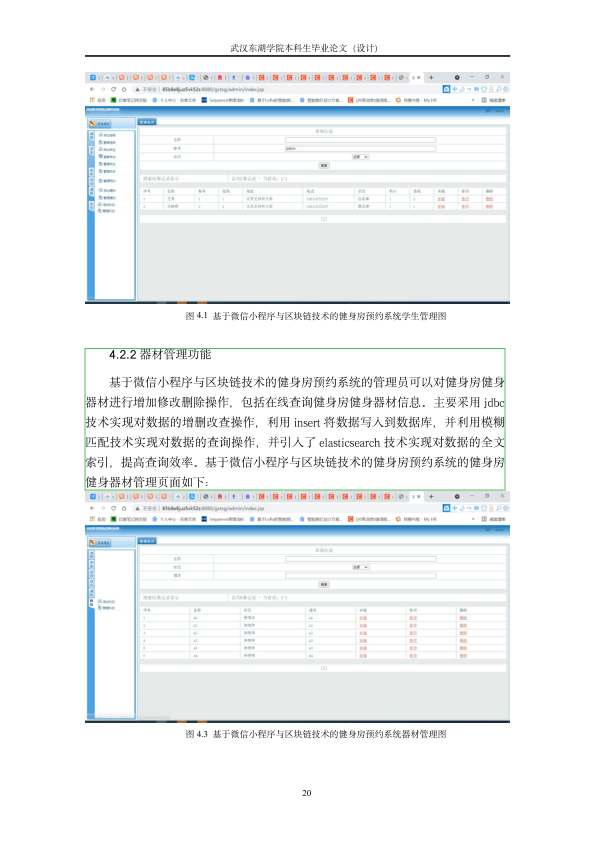

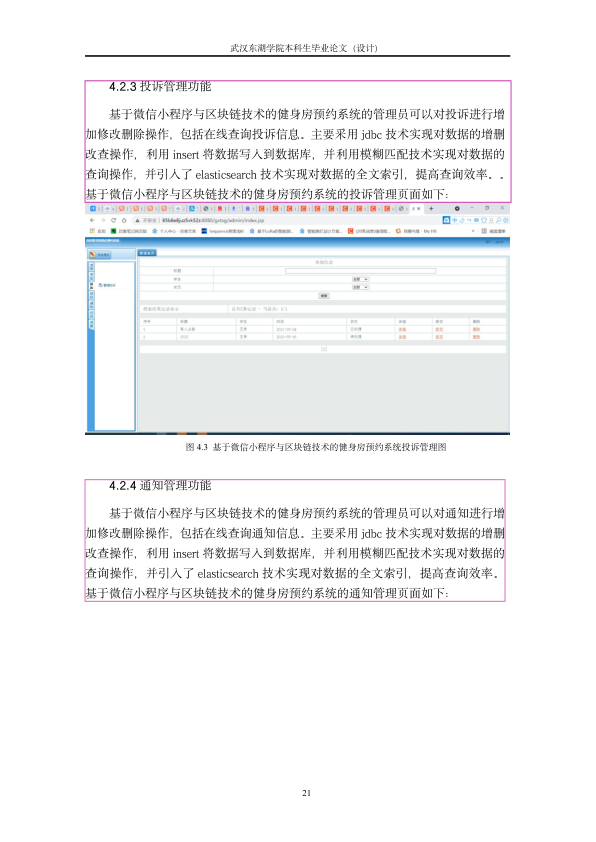

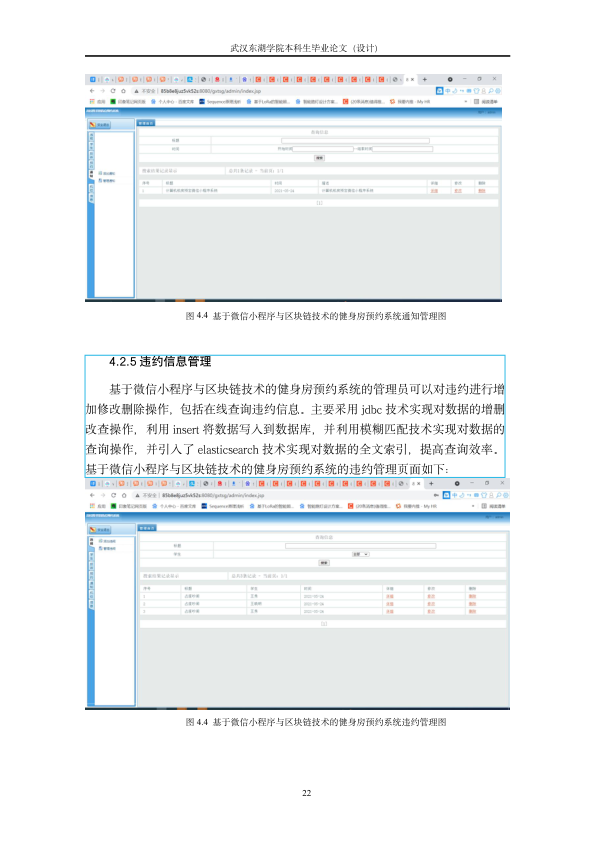

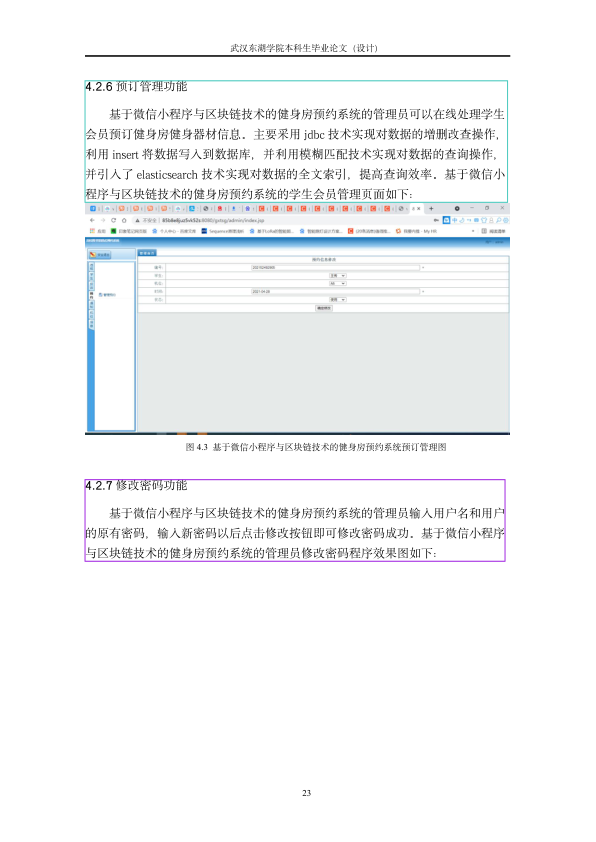

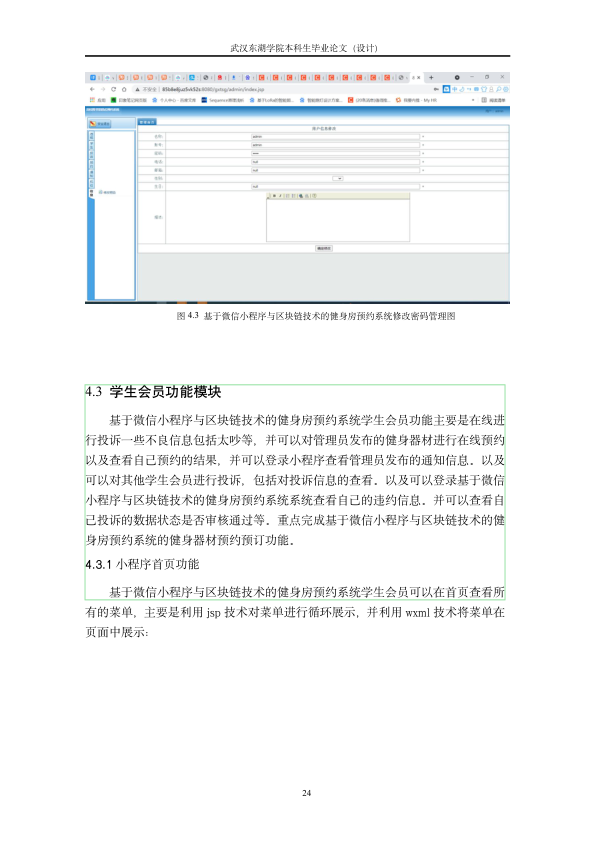

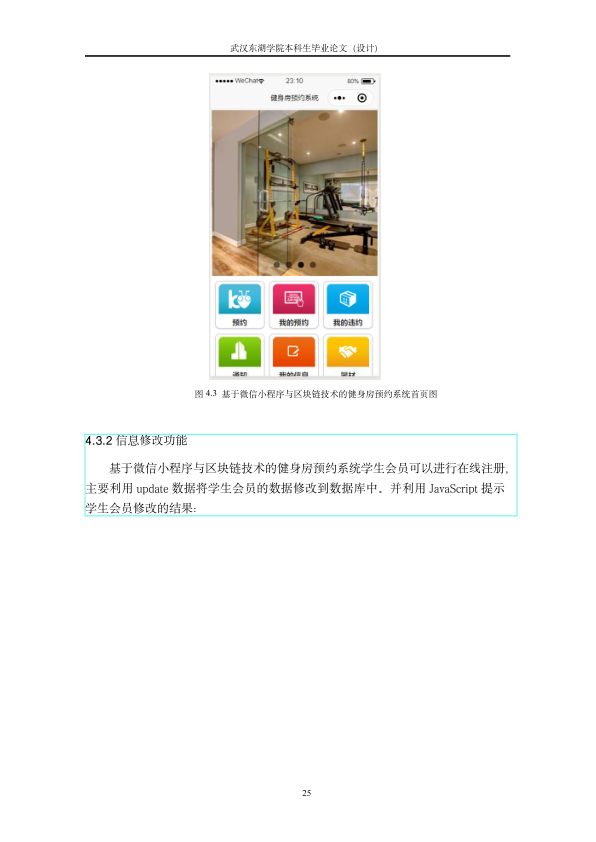

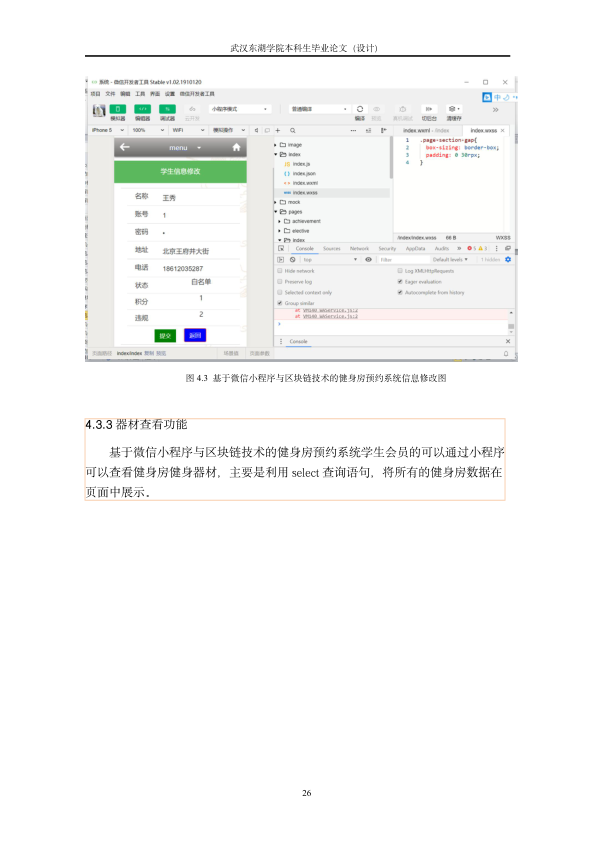

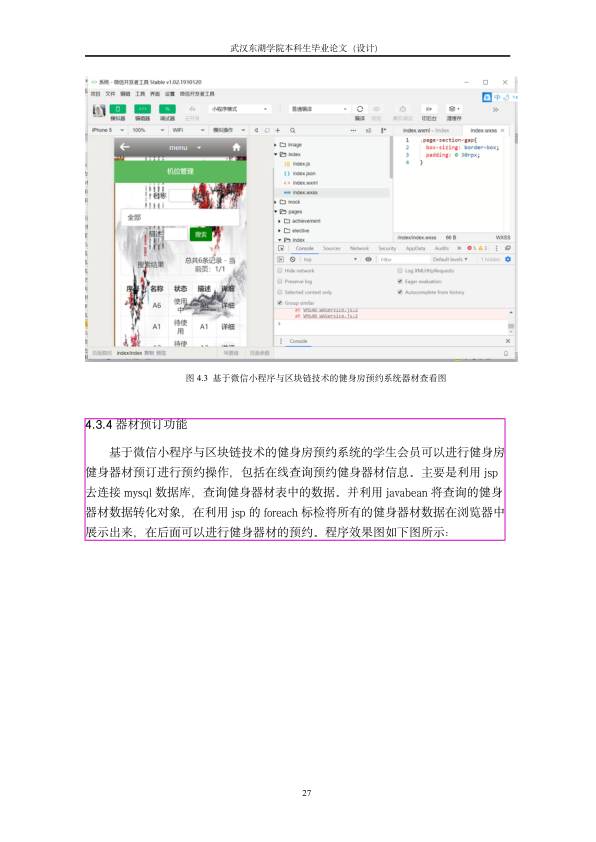

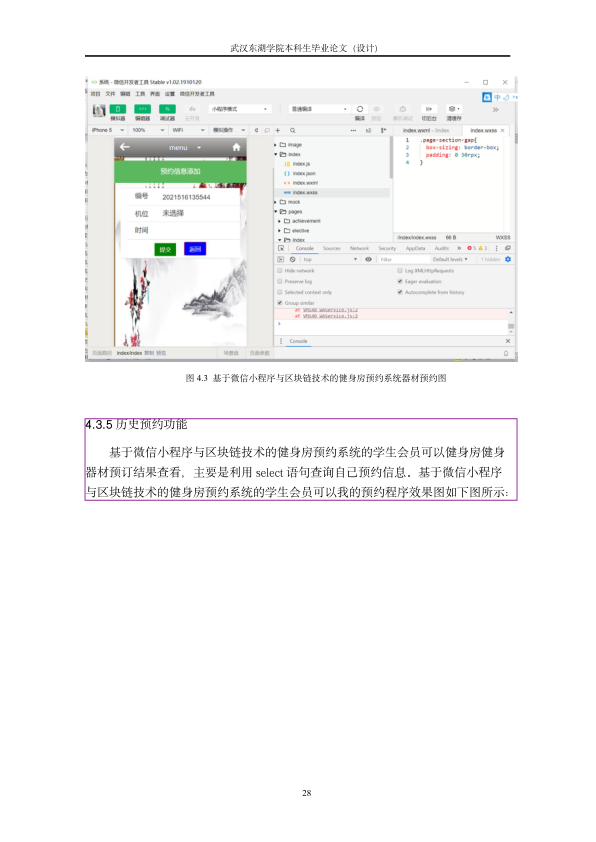

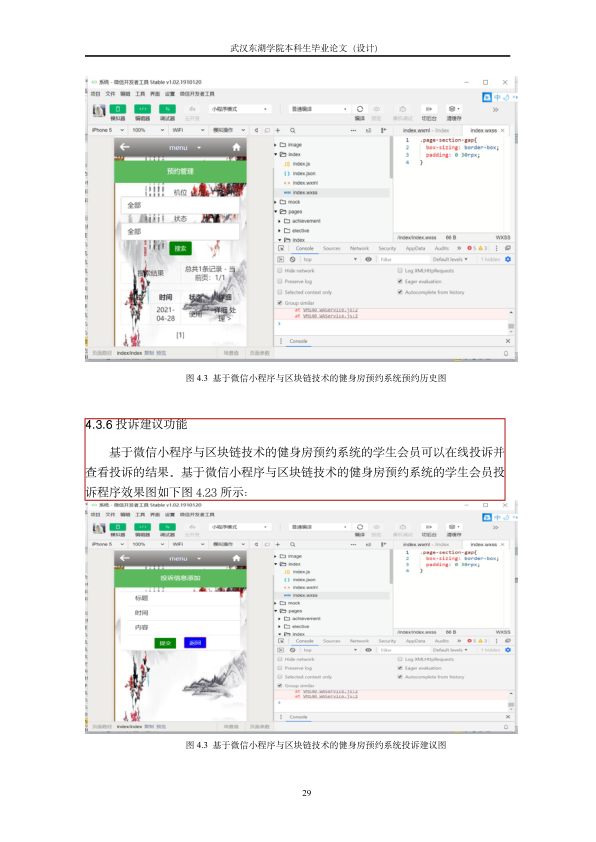

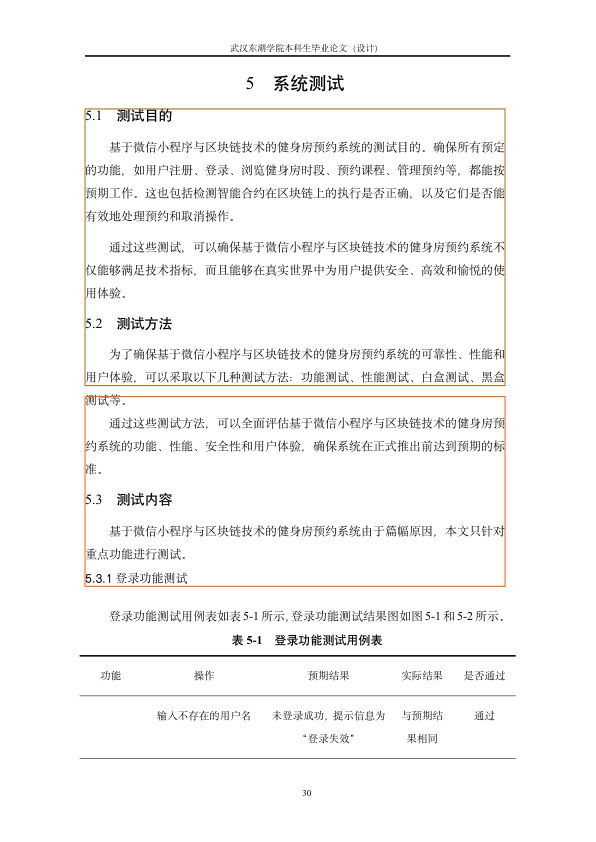

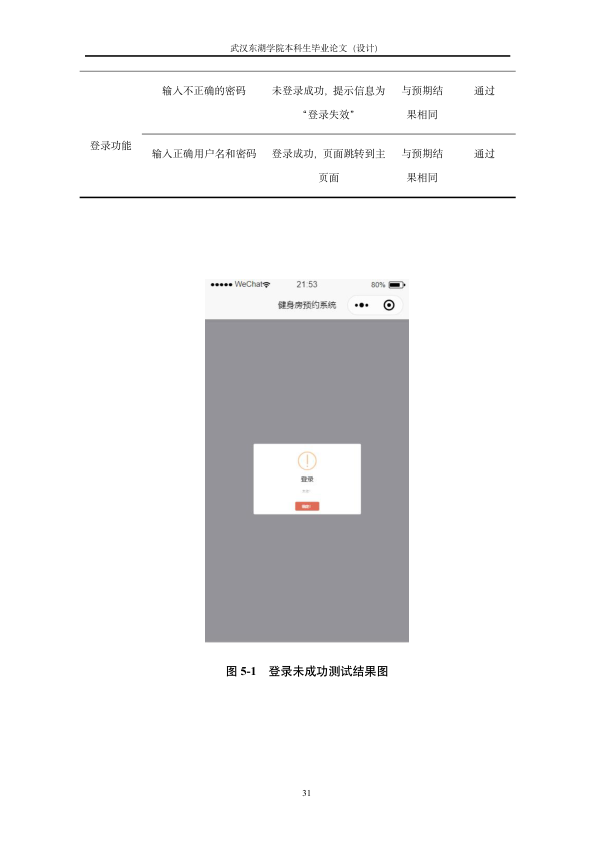

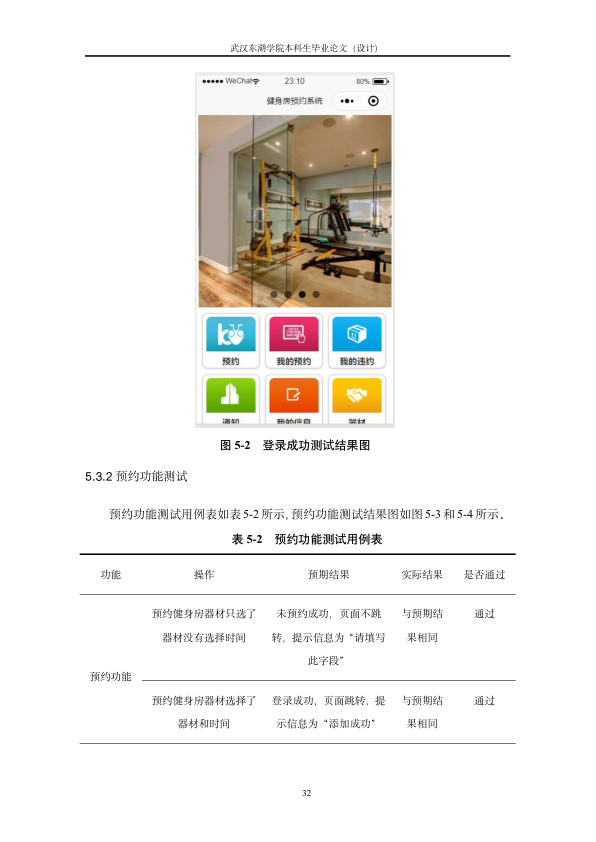

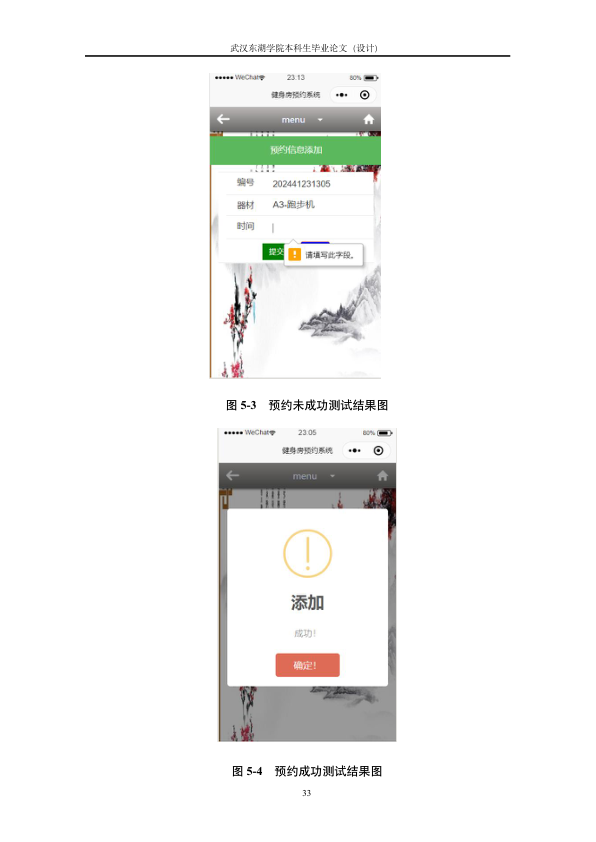

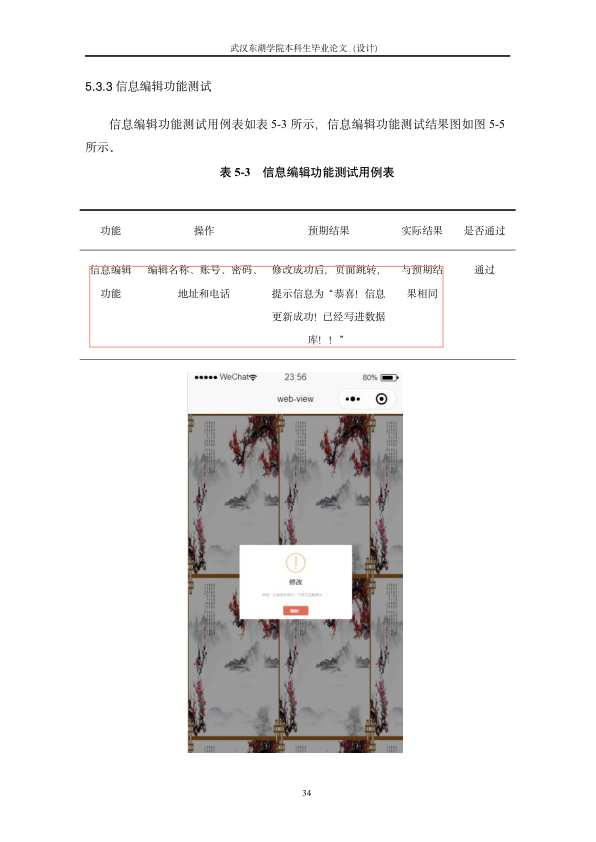

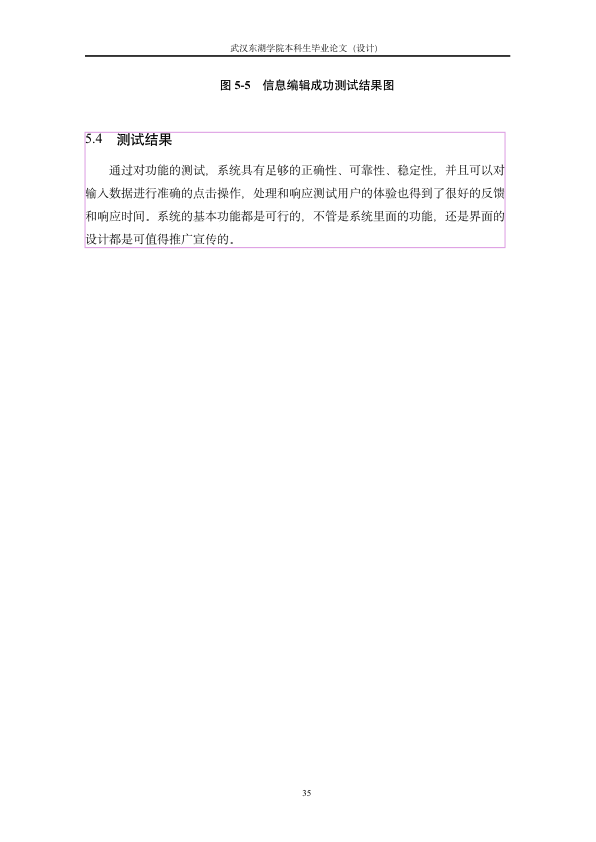

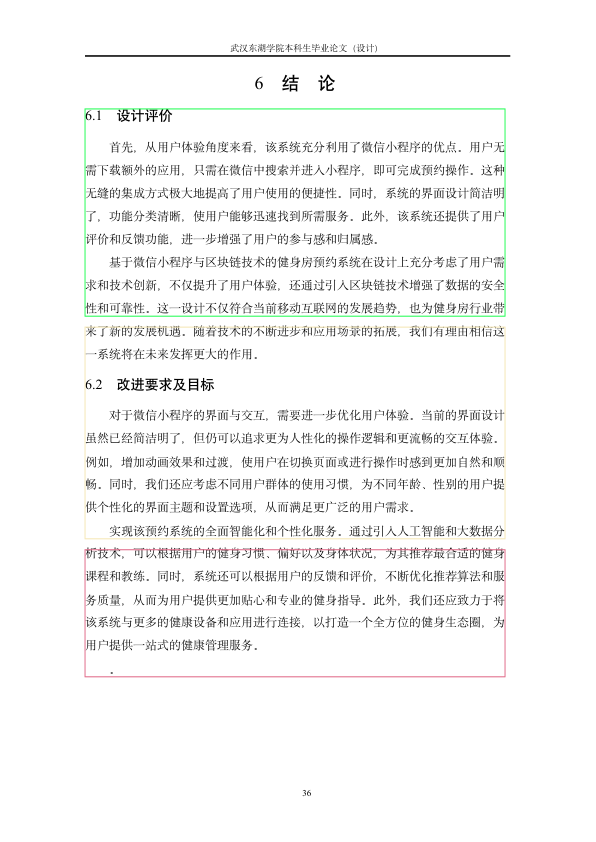

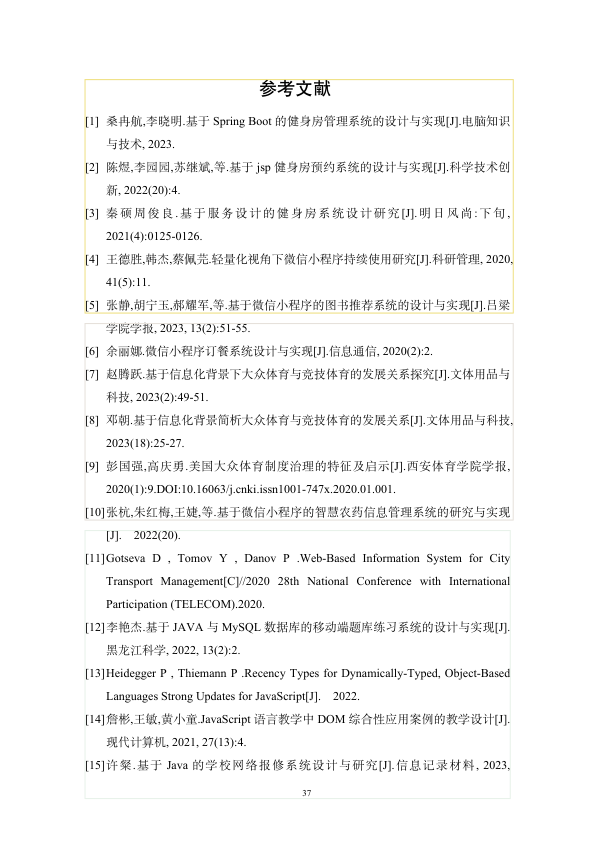

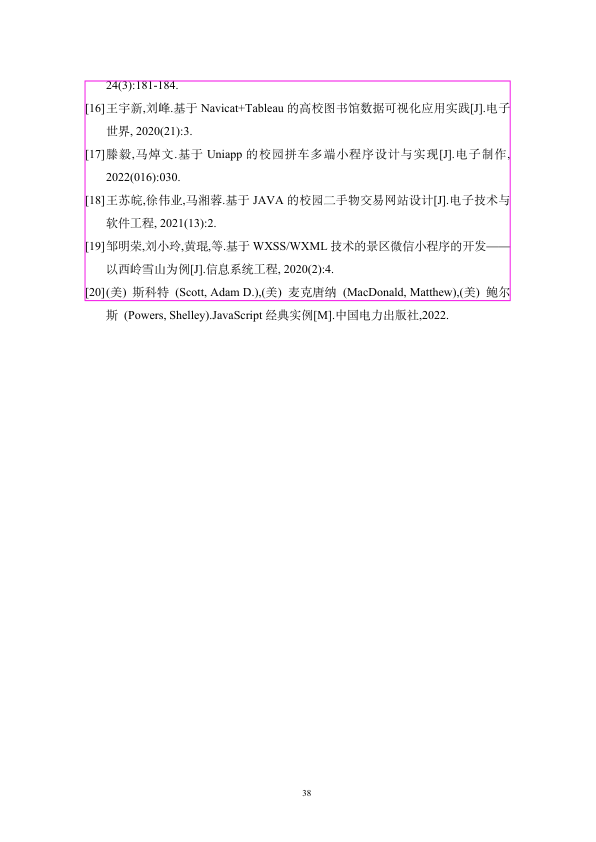

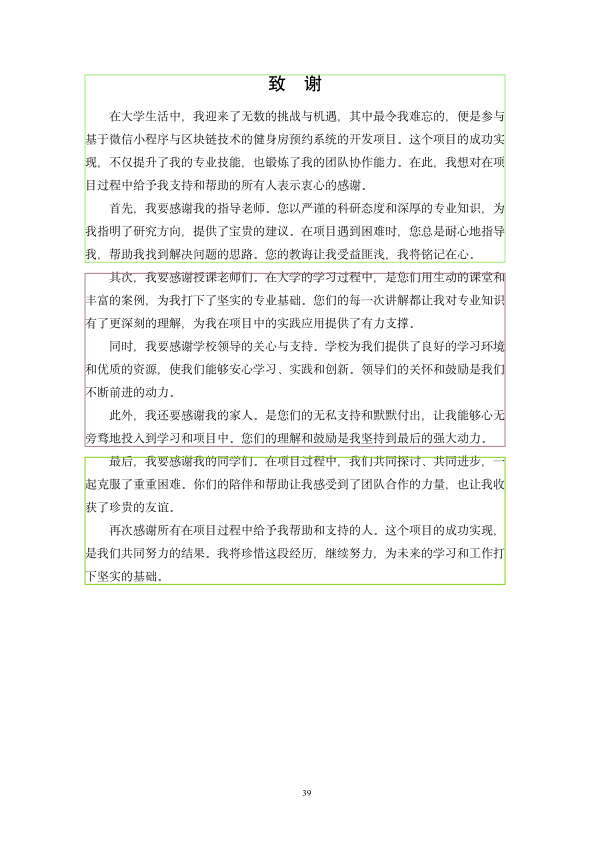

In [37]:
pdf = Pdf(pdf_path)
pdf.display_with_bboxes(
    parsed_pdf.nodes,
)